C:\Users\USER\AppData\Local\Temp\ipykernel_8084\1121584493.py:17: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = get_cmap('tab20', num_configs)  # gunakan colormap diskrit agar warna benar-benar berbeda


Plot disimpan sebagai 'tracking_validation_loss_fgi.png'


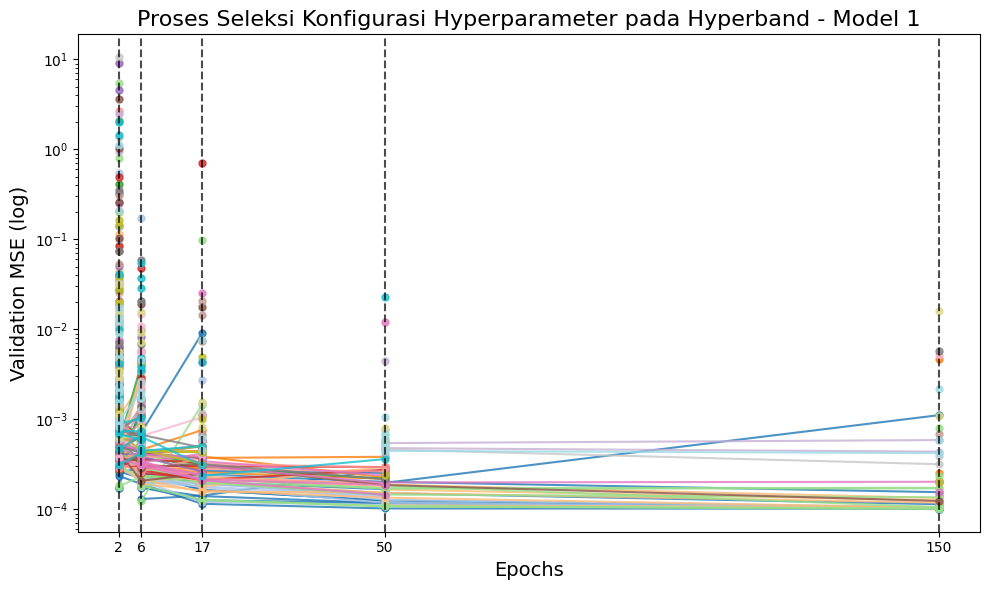

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.cm import get_cmap

df = pd.read_csv('seluruh_hasil_tuning_lstm.csv')

hyperparameter_cols = [
    'num_lstm_layers', 'units_0', 'kernel_reg', 'dropout_0', 
    'learning_rate', 'optimizer', 'batch_size', 'sequence_length',
    'units_1', 'dropout_1', 'units_2', 'dropout_2'
]

df_filled = df.fillna(-1)
grouped = list(df_filled.groupby(hyperparameter_cols))  # convert ke list agar bisa dihitung panjangnya
num_configs = len(grouped)
cmap = get_cmap('tab20', num_configs)  # gunakan colormap diskrit agar warna benar-benar berbeda

plt.style.use('default')
fig, ax = plt.subplots(figsize=(10, 6))
unique_epochs = sorted(df['tuner/epochs'].unique())

for i, (_, g) in enumerate(grouped):
    g = g.sort_values('tuner/epochs')
    ax.plot(g['tuner/epochs'], g['val_mse'], marker='o', linestyle='-', color=cmap(i), markersize=5, alpha=0.8)

for epoch in unique_epochs:
    ax.axvline(x=epoch, color='black', linestyle='--', linewidth=1.5, alpha=0.7)

ax.set_xlabel('Epochs', fontsize=14)
ax.set_ylabel('Validation MSE (log)', fontsize=14)
ax.set_title('Proses Seleksi Konfigurasi Hyperparameter pada Hyperband - Model 1', fontsize=16)
ax.set_xticks(unique_epochs)
ax.set_yscale('log')
plt.tight_layout()
plt.savefig('tracking_validation_loss.png', dpi=300)
print("Plot disimpan sebagai 'tracking_validation_loss_fgi.png'")


C:\Users\USER\AppData\Local\Temp\ipykernel_12176\4009717671.py:17: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = get_cmap('tab20', num_configs)


Plot disimpan sebagai 'tracking_validation_loss.png'

Konfigurasi terbaik:
num_lstm_layers         1
units_0               128
kernel_reg         0.0001
dropout_0             0.1
learning_rate        0.01
optimizer            adam
batch_size             32
sequence_length        14
units_1              96.0
dropout_1             0.1
units_2              96.0
dropout_2            0.01
Name: 0, dtype: object


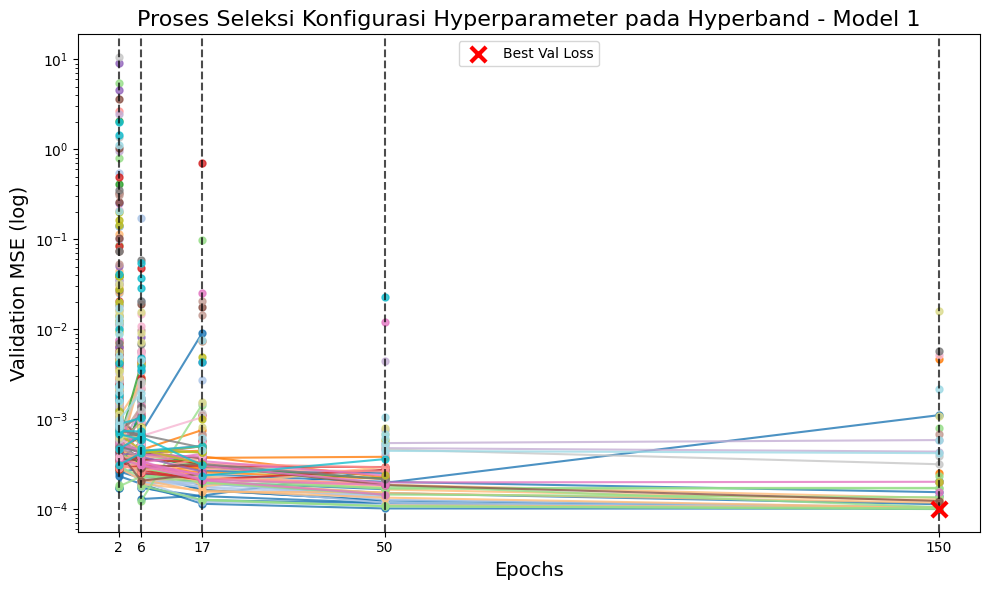

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.cm import get_cmap

df = pd.read_csv('seluruh_hasil_tuning_lstm.csv')

hyperparameter_cols = [
    'num_lstm_layers', 'units_0', 'kernel_reg', 'dropout_0', 
    'learning_rate', 'optimizer', 'batch_size', 'sequence_length',
    'units_1', 'dropout_1', 'units_2', 'dropout_2'
]

df_filled = df.fillna(-1)
grouped = list(df_filled.groupby(hyperparameter_cols))  
num_configs = len(grouped)
cmap = get_cmap('tab20', num_configs)

plt.style.use('default')
fig, ax = plt.subplots(figsize=(10, 6))
unique_epochs = sorted(df['tuner/epochs'].unique())

for i, (_, g) in enumerate(grouped):
    g = g.sort_values('tuner/epochs')
    ax.plot(g['tuner/epochs'], g['val_mse'], marker='o', linestyle='-', 
            color=cmap(i), markersize=5, alpha=0.8)

for epoch in unique_epochs:
    ax.axvline(x=epoch, color='black', linestyle='--', linewidth=1.5, alpha=0.7)

# Cari titik dengan val_mse terendah
best_idx = df['val_mse'].idxmin()
best_row = df.loc[best_idx]
best_epoch = best_row['tuner/epochs']
best_val = best_row['val_mse']

# Tandai titik terbaik dengan X merah besar
ax.scatter(best_epoch, best_val, color='red', s=120, marker='x', linewidth=3, zorder=5, label='Best Val Loss')

ax.set_xlabel('Epochs', fontsize=14)
ax.set_ylabel('Validation MSE (log)', fontsize=14)
ax.set_title('Proses Seleksi Konfigurasi Hyperparameter pada Hyperband - Model 1', fontsize=16)
ax.set_xticks(unique_epochs)
ax.set_yscale('log')
ax.legend()
plt.tight_layout()
plt.savefig('tracking_validation_loss.png', dpi=300)
print("Plot disimpan sebagai 'tracking_validation_loss.png'")
print("\nKonfigurasi terbaik:")
print(best_row[hyperparameter_cols])


C:\Users\USER\AppData\Local\Temp\ipykernel_12176\2682507802.py:17: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = get_cmap('tab20', num_configs)


Plot disimpan sebagai 'tracking_validation_loss_fgi.png'

Konfigurasi terbaik:
num_lstm_layers         1
units_0               128
kernel_reg         0.0001
dropout_0            0.01
learning_rate        0.01
optimizer            adam
batch_size             64
sequence_length         7
units_1                96
dropout_1             0.2
units_2              64.0
dropout_2             0.2
Name: 0, dtype: object


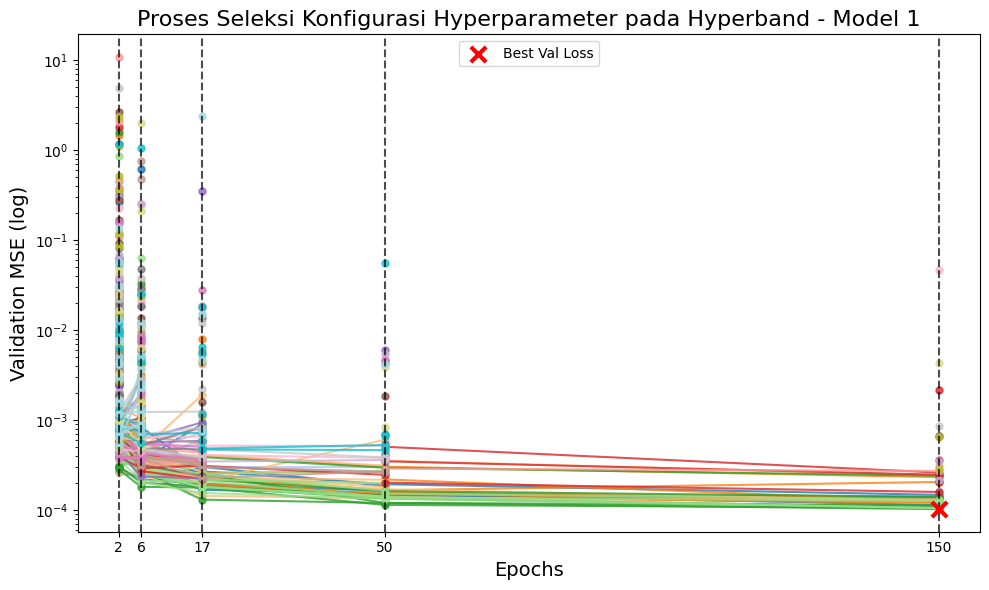

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.cm import get_cmap

df = pd.read_csv('seluruh_hasil_tuning_lstm_fgi.csv')

hyperparameter_cols = [
    'num_lstm_layers', 'units_0', 'kernel_reg', 'dropout_0', 
    'learning_rate', 'optimizer', 'batch_size', 'sequence_length',
    'units_1', 'dropout_1', 'units_2', 'dropout_2'
]

df_filled = df.fillna(-1)
grouped = list(df_filled.groupby(hyperparameter_cols))  
num_configs = len(grouped)
cmap = get_cmap('tab20', num_configs)

plt.style.use('default')
fig, ax = plt.subplots(figsize=(10, 6))
unique_epochs = sorted(df['tuner/epochs'].unique())

for i, (_, g) in enumerate(grouped):
    g = g.sort_values('tuner/epochs')
    ax.plot(g['tuner/epochs'], g['val_mse'], marker='o', linestyle='-', 
            color=cmap(i), markersize=5, alpha=0.8)

for epoch in unique_epochs:
    ax.axvline(x=epoch, color='black', linestyle='--', linewidth=1.5, alpha=0.7)

# Cari titik dengan val_mse terendah
best_idx = df['val_mse'].idxmin()
best_row = df.loc[best_idx]
best_epoch = best_row['tuner/epochs']
best_val = best_row['val_mse']

# Tandai titik terbaik dengan X merah besar
ax.scatter(best_epoch, best_val, color='red', s=120, marker='x', linewidth=3, zorder=5, label='Best Val Loss')

ax.set_xlabel('Epochs', fontsize=14)
ax.set_ylabel('Validation MSE (log)', fontsize=14)
ax.set_title('Proses Seleksi Konfigurasi Hyperparameter pada Hyperband - Model 1', fontsize=16)
ax.set_xticks(unique_epochs)
ax.set_yscale('log')
ax.legend()
plt.tight_layout()
plt.savefig('tracking_validation_loss.png', dpi=300)
print("Plot disimpan sebagai 'tracking_validation_loss_fgi.png'")
print("\nKonfigurasi terbaik:")
print(best_row[hyperparameter_cols])


C:\Users\USER\AppData\Local\Temp\ipykernel_8084\2933153908.py:17: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = get_cmap('tab20', num_configs)  # gunakan colormap diskrit agar warna benar-benar berbeda


Plot disimpan sebagai 'tracking_validation_loss_fgi.png'


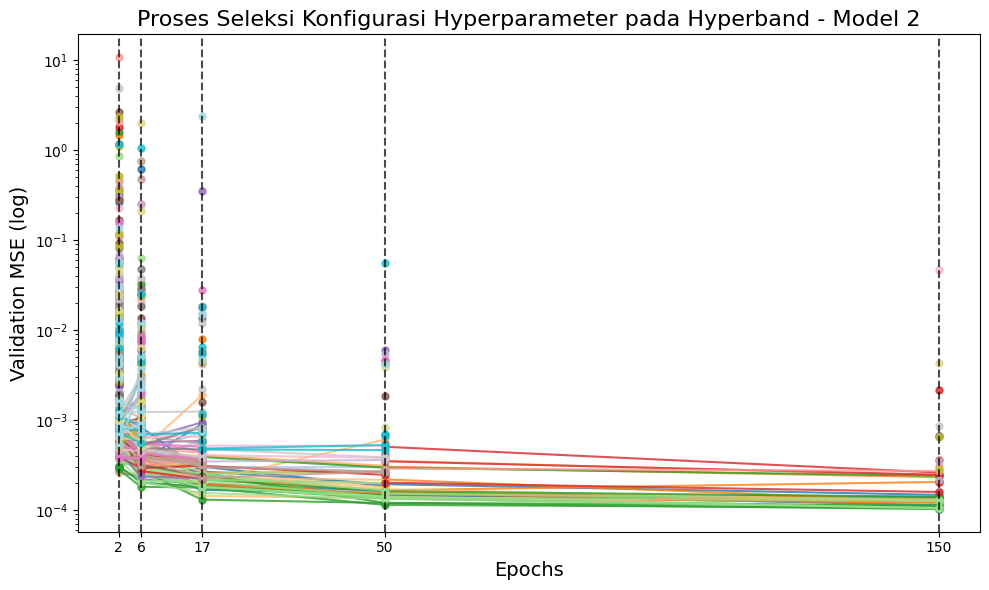

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.cm import get_cmap

df = pd.read_csv('seluruh_hasil_tuning_lstm_fgi.csv')

hyperparameter_cols = [
    'num_lstm_layers', 'units_0', 'kernel_reg', 'dropout_0', 
    'learning_rate', 'optimizer', 'batch_size', 'sequence_length',
    'units_1', 'dropout_1', 'units_2', 'dropout_2'
]

df_filled = df.fillna(-1)
grouped = list(df_filled.groupby(hyperparameter_cols))  # convert ke list agar bisa dihitung panjangnya
num_configs = len(grouped)
cmap = get_cmap('tab20', num_configs)  # gunakan colormap diskrit agar warna benar-benar berbeda

plt.style.use('default')
fig, ax = plt.subplots(figsize=(10, 6))
unique_epochs = sorted(df['tuner/epochs'].unique())

for i, (_, g) in enumerate(grouped):
    g = g.sort_values('tuner/epochs')
    ax.plot(g['tuner/epochs'], g['val_mse'], marker='o', linestyle='-', color=cmap(i), markersize=5, alpha=0.8)

for epoch in unique_epochs:
    ax.axvline(x=epoch, color='black', linestyle='--', linewidth=1.5, alpha=0.7)

ax.set_xlabel('Epochs', fontsize=14)
ax.set_ylabel('Validation MSE (log)', fontsize=14)
ax.set_title('Proses Seleksi Konfigurasi Hyperparameter pada Hyperband - Model 2', fontsize=16)
ax.set_xticks(unique_epochs)
ax.set_yscale('log')
plt.tight_layout()
plt.savefig('tracking_validation_loss_fgi.png', dpi=300)
print("Plot disimpan sebagai 'tracking_validation_loss_fgi.png'")


In [9]:
import pandas as pd

df = pd.read_csv('seluruh_hasil_tuning_lstm_fgi.csv')

hyperparameter_cols = [
    'num_lstm_layers', 'units_0', 'kernel_reg', 'dropout_0', 
    'learning_rate', 'optimizer', 'batch_size', 'sequence_length',
    'units_1', 'dropout_1', 'units_2', 'dropout_2'
]

# Ganti NaN dengan nilai yang tidak mungkin muncul dalam konfigurasi (misalnya -1)
df_filled = df[hyperparameter_cols].fillna(-1)

# Hitung jumlah konfigurasi unik (DNA)
num_unique_configs = df_filled.drop_duplicates().shape[0]

print(f"Jumlah konfigurasi (DNA) unik yang diuji: {num_unique_configs}")

Jumlah konfigurasi (DNA) unik yang diuji: 516


In [10]:
import pandas as pd

df = pd.read_csv('seluruh_hasil_tuning_lstm.csv')

hyperparameter_cols = [
    'num_lstm_layers', 'units_0', 'kernel_reg', 'dropout_0', 
    'learning_rate', 'optimizer', 'batch_size', 'sequence_length',
    'units_1', 'dropout_1', 'units_2', 'dropout_2'
]

# Ganti NaN dengan nilai yang tidak mungkin muncul dalam konfigurasi (misalnya -1)
df_filled = df[hyperparameter_cols].fillna(-1)

# Hitung jumlah konfigurasi unik (DNA)
num_unique_configs = df_filled.drop_duplicates().shape[0]

print(f"Jumlah konfigurasi (DNA) unik yang diuji: {num_unique_configs}")

Jumlah konfigurasi (DNA) unik yang diuji: 523


In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- Pengaturan Awal ---
# Mengatur style plot agar terlihat lebih profesional
sns.set_theme(style="whitegrid")

# Nama file hasil tuning (pastikan file ada di direktori yang sama)
file_tanpa_fgi = "C:/Users/USER/Documents/ITERA/Semester 7/SKRIPSI/A TERBARU/Code dan Data/seluruh_hasil_tuning_lstm.csv"
file_dengan_fgi = 'C:/Users/USER/Documents/ITERA/Semester 7/SKRIPSI/A TERBARU/Code dan Data/seluruh_hasil_tuning_lstm_fgi.csv'

# Kolom hyperparameter yang ingin dianalisis distribusinya
cols_to_analyze = [
    'trial_id',
    'val_mse',
    'optimizer',
    'num_lstm_layers',
    'units_0',
    'batch_size',
    'dropout_0',
    'kernel_reg',
    ''
]

# --- Memuat Data ---
try:
    df_no_fgi = pd.read_csv(file_tanpa_fgi)
    df_fgi = pd.read_csv(file_dengan_fgi)
    print("✅ Berhasil memuat kedua file CSV hasil tuning.\n")
except FileNotFoundError as e:
    print(f"⚠️ Error: File tidak ditemukan! Pastikan file '{e.filename}' ada di direktori yang sama dengan skrip ini.")
    exit()

✅ Berhasil memuat kedua file CSV hasil tuning.



In [7]:
import pandas as pd

# --- Lokasi File ---
file_tanpa_fgi = "C:/Users/USER/Documents/ITERA/Semester 7/SKRIPSI/A TERBARU/Code dan Data/seluruh_hasil_tuning_lstm.csv"
file_dengan_fgi = "C:/Users/USER/Documents/ITERA/Semester 7/SKRIPSI/A TERBARU/Code dan Data/seluruh_hasil_tuning_lstm_fgi.csv"

# --- Urutan Kolom Tertata ---
cols_ordered = [
    'trial_id', 'val_mse', 'sequence_length',
    'num_lstm_layers', 'units_0', 'units_1', 'units_2',
    'dropout_0', 'dropout_1', 'dropout_2',
    'kernel_reg', 'optimizer', 'learning_rate', 'batch_size'
]

# --- Load Data ---
df_no_fgi = pd.read_csv(file_tanpa_fgi)
df_fgi = pd.read_csv(file_dengan_fgi)

# --- Ambil 10 Terbaik dan 10 Terburuk ---
top10_no_fgi = df_no_fgi.sort_values(by='val_mse').loc[:, cols_ordered].head(10)
bottom10_no_fgi = df_no_fgi.sort_values(by='val_mse').loc[:, cols_ordered].tail(10)

top10_fgi = df_fgi.sort_values(by='val_mse').loc[:, cols_ordered].head(10)
bottom10_fgi = df_fgi.sort_values(by='val_mse').loc[:, cols_ordered].tail(10)

# --- Export ke LaTeX ---
with open("tabel_hasil_tuning_latex.txt", "w", encoding='utf-8') as f:
    f.write("% --- Model Tanpa FGI ---\n")
    f.write("\\subsection*{10 Konfigurasi Terbaik: Model Tanpa FGI}\n")
    f.write(top10_no_fgi.to_latex(index=False, longtable=True, caption="10 Konfigurasi Terbaik Model Tanpa FGI", label="tab:top10_nofgi"))

    f.write("\n\\subsection*{10 Konfigurasi Terburuk: Model Tanpa FGI}\n")
    f.write(bottom10_no_fgi.to_latex(index=False, longtable=True, caption="10 Konfigurasi Terburuk Model Tanpa FGI", label="tab:bottom10_nofgi"))

    f.write("\n% --- Model Dengan FGI ---\n")
    f.write("\\subsection*{10 Konfigurasi Terbaik: Model Dengan FGI}\n")
    f.write(top10_fgi.to_latex(index=False, longtable=True, caption="10 Konfigurasi Terbaik Model Dengan FGI", label="tab:top10_fgi"))

    f.write("\n\\subsection*{10 Konfigurasi Terburuk: Model Dengan FGI}\n")
    f.write(bottom10_fgi.to_latex(index=False, longtable=True, caption="10 Konfigurasi Terburuk Model Dengan FGI", label="tab:bottom10_fgi"))

print("✅ Hasil sudah diekspor ke file LaTeX: 'tabel_hasil_tuning_latex.txt'")


✅ Hasil sudah diekspor ke file LaTeX: 'tabel_hasil_tuning_latex.txt'


In [13]:

# ==============================================================================
# ANALISIS 2: Distribusi Hyperparameter pada 20 Trial Terbaik
# ==============================================================================

def analyze_distributions(df, model_name):
    """Menganalisis dan mencetak distribusi hyperparameter dari 20 trial terbaik."""
    print("-" * 50)
    print(f"Distribusi  {model_name}")
    print("-" * 50)

    top_20 = df.head(50)

    for col in cols_to_analyze:
        # Menghitung distribusi dalam bentuk persentase
        distribution = top_20[col].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'
        print(f"\nParameter: '{col}'")
        print(distribution.to_string())
    print("\n")


print("## ANALISIS 2: DISTRIBUSI HYPERPARAMETER ##\n")
analyze_distributions(df_no_fgi, "Model 1 (Tanpa FGI)")
analyze_distributions(df_fgi, "Model 2 (Dengan FGI)")

## ANALISIS 2: DISTRIBUSI HYPERPARAMETER ##

--------------------------------------------------
Distribusi  Model 1 (Tanpa FGI)
--------------------------------------------------

Parameter: 'optimizer'
optimizer
adam       92.0%
rmsprop     8.0%

Parameter: 'num_lstm_layers'
num_lstm_layers
1    94.0%
2     6.0%

Parameter: 'units_0'
units_0
64     56.0%
128    24.0%
96     20.0%

Parameter: 'batch_size'
batch_size
32     46.0%
64     44.0%
128    10.0%

Parameter: 'dropout_0'
dropout_0
0.01    38.0%
0.10    36.0%
0.20    26.0%

Parameter: 'kernel_reg'
kernel_reg
0.0001    62.0%
0.0010    38.0%

Parameter: 'sequence_length'
sequence_length
21    50.0%
14    34.0%
7     16.0%


--------------------------------------------------
Distribusi  Model 2 (Dengan FGI)
--------------------------------------------------

Parameter: 'optimizer'
optimizer
adam       72.0%
rmsprop    28.0%

Parameter: 'num_lstm_layers'
num_lstm_layers
1    98.0%
2     2.0%

Parameter: 'units_0'
units_0
128    48.0%

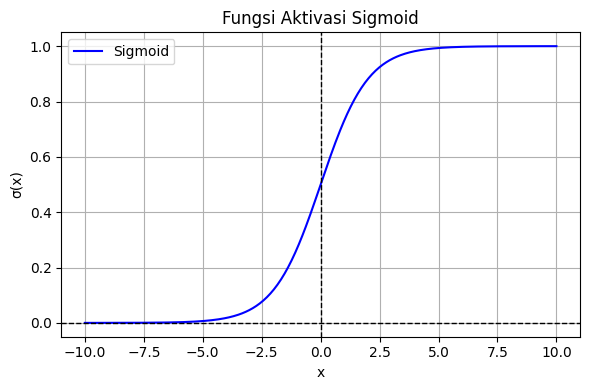

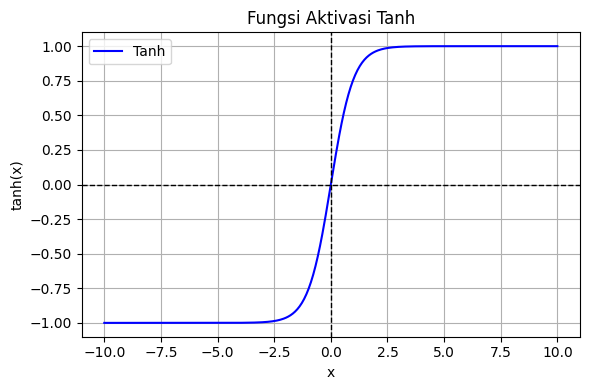

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Rentang input
x = np.linspace(-10, 10, 400)

# Fungsi aktivasi
sigmoid = 1 / (1 + np.exp(-x))
tanh = np.tanh(x)

# Plot Sigmoid
plt.figure(figsize=(6, 4))
plt.plot(x, sigmoid, label='Sigmoid', color='blue')
plt.title('Fungsi Aktivasi Sigmoid')
plt.xlabel('x')
plt.ylabel('σ(x)')
plt.grid(True)
plt.axhline(0, color='black', linestyle='--', linewidth=1)
plt.axvline(0, color='black', linestyle='--', linewidth=1)
plt.legend()
plt.tight_layout()
plt.savefig("sigmoid_plot.png", dpi=300)
plt.show()

# Plot Tanh
plt.figure(figsize=(6, 4))
plt.plot(x, tanh, label='Tanh', color='blue')
plt.title('Fungsi Aktivasi Tanh')
plt.xlabel('x')
plt.ylabel('tanh(x)')
plt.grid(True)
plt.axhline(0, color='black', linestyle='--', linewidth=1)
plt.axvline(0, color='black', linestyle='--', linewidth=1)
plt.legend()
plt.tight_layout()
plt.savefig("tanh_plot.png", dpi=300)
plt.show()

In [4]:
import pandas as pd

# Load the uploaded CSV files
model1 = pd.read_csv("hasil_prediksi_model_1.csv")
model2 = pd.read_csv("hasil_prediksi_model_2.csv")

# Check shapes and preview the first few rows
model1_shape = model1.shape
model2_shape = model2.shape
model1_head = model1.head()
model2_head = model2.head()

# Compare y_true values
same_y_true = model1['y_true'].equals(model2['y_true'])

model1_shape, model2_shape, model1_head, model2_head, same_y_true

((521, 2),
 (521, 2),
         y_true       y_pred
 0  42520.40234  41643.88211
 1  43442.85547  40779.25451
 2  42627.85547  41314.59018
 3  42099.40234  41040.35982
 4  42156.90234  40335.41843,
         y_true       y_pred
 0  42520.40234  44355.16951
 1  43442.85547  43399.25704
 2  42627.85547  44170.31449
 3  42099.40234  43784.41959
 4  42156.90234  43031.69426,
 False)

In [5]:
import numpy as np
from scipy.stats import wilcoxon

# Extract y_true and y_pred
y_true_1 = model1['y_true']
y_pred_1 = model1['y_pred']
y_true_2 = model2['y_true']
y_pred_2 = model2['y_pred']

# Check if y_true are close enough numerically
y_true_allclose = np.allclose(y_true_1, y_true_2)

# Use y_true from one model
y_true = y_true_1

# Compute daily MAPE
mape1 = np.abs((y_true - y_pred_1) / y_true)
mape2 = np.abs((y_true - y_pred_2) / y_true)

# Compute mean MAPE
mean_mape1 = mape1.mean() * 100
mean_mape2 = mape2.mean() * 100

# Wilcoxon signed-rank test
stat, p_value = wilcoxon(mape1, mape2, alternative='greater')

{
    "y_true_allclose": y_true_allclose,
    "mean_mape_model1": mean_mape1,
    "mean_mape_model2": mean_mape2,
    "wilcoxon_stat": stat,
    "p_value": p_value
}


{'y_true_allclose': False,
 'mean_mape_model1': 6.021082960409137,
 'mean_mape_model2': 2.4893764405364176,
 'wilcoxon_stat': 125435.0,
 'p_value': 5.6088368356367e-63}